In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    sn.set(rc={'figure.figsize':(10,7)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

## Load Data

In [3]:
with open('data/data_eval_arduino.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
X_eval = [d[0] for d in data]
y_eval_ard = [d[1] for d in data]
y_eval = [d[2] for d in data]

## Load Model

In [5]:
with open('models/rf_model_paper.pkl', 'rb') as f:
    model = pickle.load(f)


ModuleNotFoundError: No module named 'sklearn.ensemble.forest'

## Evaluate Peformances

### Arduino

In [6]:
f1_score(y_eval, y_eval_ard, average="weighted")

0.7855807325543913

In [7]:
print(classification_report(y_eval, y_eval_ard))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.63      0.62      0.63        50
           2       0.72      0.84      0.78        50
           3       0.88      0.88      0.88        50
           4       0.80      0.72      0.76        50
           5       0.75      0.84      0.79        50
           6       0.96      0.90      0.93        50

    accuracy                           0.79       350
   macro avg       0.79      0.79      0.79       350
weighted avg       0.79      0.79      0.79       350



In [8]:
print(confusion_matrix(y_eval, y_eval_ard))

[[35 12  3  0  0  0  0]
 [10 31  9  0  0  0  0]
 [ 0  6 42  2  0  0  0]
 [ 0  0  3 44  3  0  0]
 [ 0  0  1  4 36  9  0]
 [ 0  0  0  0  6 42  2]
 [ 0  0  0  0  0  5 45]]


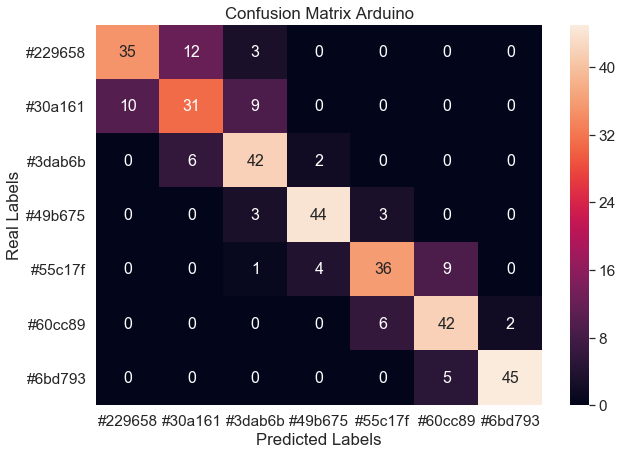

In [15]:
labels = ["#229658", "#30a161", "#3dab6b", "#49b675", "#55c17f", "#60cc89", "#6bd793"]

printConfusionMatrix(confusion_matrix(y_eval, y_eval_ard), labels, "Confusion Matrix Arduino")


### Full Model

In [49]:
y_eval_pred = model.predict(X_eval)

In [50]:
f1_score(y_eval, y_eval_pred, average="weighted")

c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0

In [51]:
print(classification_report(y_eval, y_eval_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [52]:
print(confusion_matrix(y_eval, y_eval_pred))

[[ 0 50  0  0  0  0  0]
 [ 0  0  0 32 16  2  0]
 [ 0  0  0  0  0  1 49]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


### Confusion Matrix Comparison

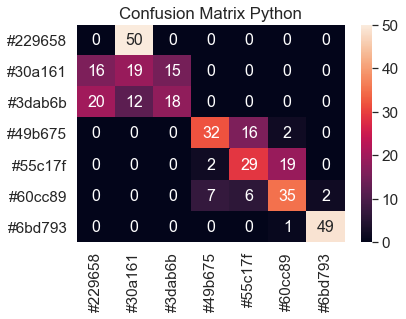

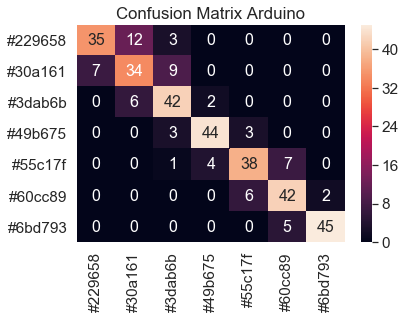

In [40]:
labels = ["#229658", "#30a161", "#3dab6b", "#49b675", "#55c17f", "#60cc89", "#6bd793"]

cm_python = confusion_matrix(y_eval, y_eval_pred)
cm_arduino = confusion_matrix(y_eval, y_eval_ard)

printConfusionMatrix(cm_python, labels, "Confusion Matrix Python")
printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")
